# Calidad de resultados segun k y alpha

## Pre - Experimentacion

In [1]:
# make cpp libraries
!cd ../../ && mkdir build
!cd ../../build/ && rm -rf *
!cd ../../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/lucas/.virtualenvs/metnum_tp2/bin/python (found version "3.8.10") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/lucas/Desktop/MetNum/TP/TP2/metnum_tp2
-- Configuring d

In [2]:
# verifico version de python e importo metnum
!pwd
!python --version

import sys
import os

p = os.path.abspath('../')
sys.path.insert(1, p)

import metnum

/home/lucas/Desktop/MetNum/TP/TP2/metnum_tp2/notebooks/calidad_k_alpha
Python 3.8.10


In [3]:
#funcion general del modelo
def predict(X_train, y_train, X_val, alpha, k, con_pca):
    
    clf = metnum.KNNClassifier(k)
    
    if con_pca:
        
        pca = metnum.PCA(alpha)
        pca.fit(X_train)
        
        X_train = pca.transform(X_train)
        X_val = pca.transform(X_val)
        
    print("prefit")
    clf.fit(X_train, y_train)
    print("post fit")
    y_pred = clf.predict(X_val)
    print("post predict")
    
    return y_pred

In [4]:
import numpy as np

def k_folds(X,y, folds):
    
    fold_size = int(X.shape[0]/folds)
    
    X_folds = []
    y_folds = []
    
    for i in range(folds):
        
        if (i + 1)*fold_size < X.shape[0]: limit = (i + 1)*fold_size
        else: limit = X.shape[0]
        
        X_folds.append(X[i*fold_size:limit])
        y_folds.append(y[i*fold_size:limit])
        
    return X_folds, y_folds

def join_folds(X_list, y_list):
    
    X_join = X_list[0]
    y_join = y_list[0]
    
    for i in range(1,len(X_list)):
    
        X_join = np.append(X_join, X_list[i], axis = 0)
        y_join = np.append(y_join, y_list[i], axis = 0)
        
    return X_join, y_join

In [5]:
# metrics

def compare_value(y_predict, y_val, i):
    
    tp, tn, fp, fn = 0, 0, 0, 0
    
    for j in range(len(y_val)):
        
        if y_val[j][0] == i:
            if y_predict[j][0] == i: tp+=1
            else: fn += 1
        else:
            if y_predict[j][0] == i: fp += 1
            else: tn += 1

    return tp, tn, fp, fn
            
def metrics_value(y_pred, y_val, i):
    
    tp, tn, fp, fn = compare_value(y_pred, y_val, i)
    
    acc = (tp + tn)/(tp + tn + fp + fn)
    prec = tp/(tp + fp)
    rec = tp/(tp + fn)
    
    return acc, prec, rec

def metrics(y_pred, y_val):
    
    acc_sum = 0
    prec_sum = 0
    rec_sum = 0
    
    for i in range(10):
        
        acc, prec, rec = metrics_value(y_pred, y_val, i)
        
        acc_sum += acc
        prec_sum += prec
        rec_sum += rec
        
    return acc_sum/10, prec_sum/10, rec_sum/10

In [6]:
# Extraigo data set MNIST
%load_ext autoreload
%autoreload 2

import pandas as pd

df_train = pd.read_csv("../../data/train.csv")

X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

np.random.shuffle(X)
np.random.shuffle(y)

## KNN (sin PCA)

In [7]:
#Particiono los datos
X_folds, y_folds = k_folds(X,y,5)
X_train, y_train = join_folds(X_folds[0:4], y_folds[0:4])
X_val, y_val = X_folds[-1], y_folds[-1]

In [8]:
from tqdm import tqdm

k_list = [1,2,5,10,20,50,100]

acc_list = []
prec_list = []
rec_list = []

print("hey")

for k in tqdm(k_list):
    
    print("we are in")
    y_pred = predict(X_train, y_train, X_val, 0,  k, False)
    y_pred = y_pred.reshape(len(y_pred), 1)
    acc, prec, rec = metrics(y_pred, y_val)
    print("we have metrics")
    acc_list.append(acc)
    prec_list.append(prec)
    rec_list.append(rec)
    
    print("here")

hey


  0%|                                                     | 0/7 [00:00<?, ?it/s]

we are in
prefit
post fit


 14%|██████▎                                     | 1/7 [04:13<25:20, 253.44s/it]

post predict
we have metrics
here
we are in
prefit
post fit


 29%|████████████▌                               | 2/7 [08:31<21:19, 255.94s/it]

post predict
we have metrics
here
we are in
prefit
post fit


 43%|██████████████████▊                         | 3/7 [12:32<16:38, 249.51s/it]

post predict
we have metrics
here
we are in
prefit
post fit


 57%|█████████████████████████▏                  | 4/7 [16:41<12:27, 249.17s/it]

post predict
we have metrics
here
we are in
prefit
post fit


 71%|███████████████████████████████▍            | 5/7 [21:11<08:33, 256.80s/it]

post predict
we have metrics
here
we are in
prefit
post fit


 86%|█████████████████████████████████████▋      | 6/7 [26:21<04:34, 274.74s/it]

post predict
we have metrics
here
we are in
prefit
post fit


100%|████████████████████████████████████████████| 7/7 [32:27<00:00, 278.21s/it]

post predict
we have metrics
here


In [9]:
print(acc_list)
print(prec_list)
print(rec_list)

[0.8209047619047618, 0.8213333333333332, 0.8213333333333335, 0.8209761904761905, 0.8211666666666666, 0.8202142857142857, 0.8213095238095238]
[0.10421860772646852, 0.10310618718869999, 0.10532946123361697, 0.10244577543605549, 0.10352914064274914, 0.098331973973833, 0.1056042458074383]
[0.10407535108582726, 0.10525130196271273, 0.10593957790034189, 0.10379177707663814, 0.10470034969665772, 0.09971455031759205, 0.10491767117873096]


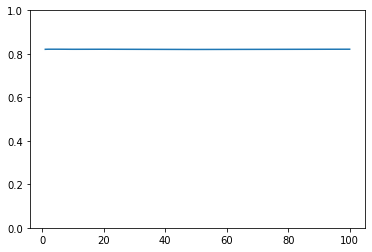

In [15]:
import matplotlib.pyplot as plt

plt.plot(k_list, acc_list)
plt.ylim(0,1)
plt.show()

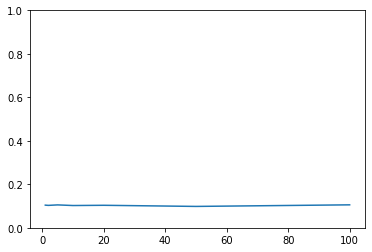

In [16]:
plt.plot(k_list, prec_list)
plt.ylim(0,1)
plt.show()

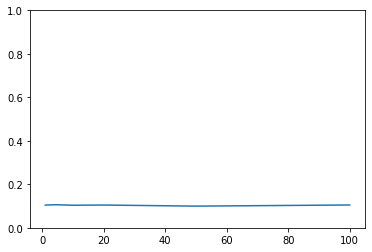

In [17]:
plt.plot(k_list, rec_list)
plt.ylim(0,1)
plt.show()

## KNN con PCA

In [10]:
k_list = [1,2,5,10,20,50,100]
alpha_list = [1,5,10,50,100]

acc_list_pca = []
prec_list_pca = []
rec_list_pca = []

print("hey")

for k in tqdm(k_list):
    
    for alpha in alpha_list:
    
        print("we are in")
        y_pred = predict(X_train, y_train, X_val, alpha,  k, True)
        y_pred = y_pred.reshape(len(y_pred), 1)
        acc, prec, rec = metrics(y_pred, y_val)
        print("we have metrics")
        acc_list_pca.append(acc)
        prec_list_pca.append(prec)
        rec_list_pca.append(rec)

        print("here")

hey


  0%|                                                     | 0/7 [00:00<?, ?it/s]

we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit


 14%|██████▎                                     | 1/7 [04:39<27:59, 279.96s/it]

post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit


 29%|████████████▌                               | 2/7 [09:26<23:37, 283.59s/it]

post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit


 43%|██████████████████▊                         | 3/7 [14:33<19:37, 294.32s/it]

post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit


 57%|█████████████████████████▏                  | 4/7 [20:13<15:37, 312.50s/it]

post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit


 71%|███████████████████████████████▍            | 5/7 [27:00<11:32, 346.45s/it]

post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit


 86%|█████████████████████████████████████▋      | 6/7 [37:09<07:15, 435.73s/it]

post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit
post predict
we have metrics
here
we are in
prefit
post fit


100%|████████████████████████████████████████████| 7/7 [52:49<00:00, 452.77s/it]

post predict
we have metrics
here


In [19]:
acc_list_pca = np.array(acc_list_pca)
prec_list_pca = np.array(prec_list_pca)
rec_list_pca = np.array(rec_list_pca)

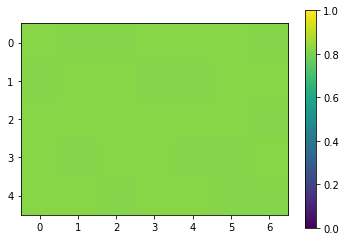

In [27]:
plt.imshow(acc_list_pca.reshape(5,7), vmin = 0, vmax = 1)
plt.colorbar()
plt.show()

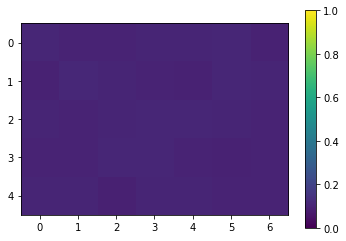

In [28]:
plt.imshow(prec_list_pca.reshape(5,7), vmin = 0, vmax = 1)
plt.colorbar()
plt.show()

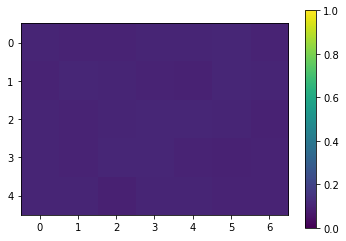

In [29]:
plt.imshow(rec_list_pca.reshape(5,7), vmin = 0, vmax = 1)
plt.colorbar()
plt.show()